In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [ ]:
model = pyo.ConcreteModel()

#Sets
model.i  = pyo.Set(initialize = ["Desk","Table","Chair"])

#Parameters
model.L = pyo.Param(model.i,initialize = {"Desk":8, "Table":6, "Chair":2})
L = model.L

model.F= pyo.Param(model.i,initialize = {"Desk":4,"Table":2,"Chair":1.5})
F = model.F

model.C = pyo.Param(model.i ,initialize = {"Desk":2,"Table":1.5,"Chair":0.5})
C= model.C

model.P = pyo.Param(model.i, initialize = {"Desk":60,"Table":30,"Chair":20} )
P = model.P

In [ ]:
#Decision Variable
model.x = pyo.Var(model.i,within=pyo.NonNegativeReals)
x = model.x

#Objective Fuction
def objective_rule(model):
  return sum(P[i]*x[i] for i in model.i)



In [ ]:
model.Obj = pyo.Objective(rule =objective_rule,sense=pyo.maximize)

In [ ]:
#Constraints

def constraint1(model,i):
  return  sum(L[i]*x[i] for i in model.i)<=48

model.Const1 = pyo.Constraint(model.i,rule = constraint1)


def constraint2(model,i):
  return sum(F[i]*x[i] for i in model.i)<=20

model.Const2 = pyo.Constraint(model.i,rule = constraint2)


def constraint3(model,i):
  return sum(C[i]*x[i] for i in model.i)<=8

model.Const3 = pyo.Constraint(model.i,rule=constraint3)

def constraint4(model,i):
  return x["Table"]<=5

model.Const4 = pyo.Constraint(model.i,rule = constraint4)

In [ ]:
# Solve
Solver = SolverFactory("glpk")
results = Solver.solve(model)

print(results)
print("Objective func =",model.Obj())
for i in model.i:
  print("number of ",i," produced = ",x[i]())


Problem: 
- Name: unknown
  Lower bound: 280.0
  Upper bound: 280.0
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 3
  Number of nonzeros: 30
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004399299621582031
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective func = 280.0
number of  Desk  produced =  2.0
number of  Table  produced =  0.0
number of  Chair  produced =  8.0


# **Problem 2**

In [ ]:
# Define the model

model = pyo.ConcreteModel()

# Decision Variable
model.x1 = pyo.Var(within = pyo.NonNegativeReals)
x1 = model.x1
model.x2 = pyo.Var(within=pyo.NonNegativeReals)
x2 = model.x2

#objective function

model.Obj =  pyo.Objective(expr = 4*x1+3*x2,sense=pyo.maximize)

#Constraints
model.Const1 = pyo.Constraint(expr=x1+x2<=40)
model.Const2 = pyo.Constraint(expr=2*x1+x2<=60)

In [ ]:
optm = SolverFactory("glpk")
results = optm.solve(model)

print(results)
print("objective func ",model.Obj())
print("x1 = ",model.x1())
print("x2 = ",model.x2())


Problem: 
- Name: unknown
  Lower bound: 140.0
  Upper bound: 140.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 2
  Number of nonzeros: 4
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0041120052337646484
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

objective func  140.0
x1 =  20.0
x2 =  20.0


In [ ]:
model = pyo.ConcreteModel()

#sets

model.i = pyo.RangeSet(1,3)
model.j = pyo.RangeSet(1,4)

"""
model.i = pyo.Set("plant1","plant2","plant3")
model.j = pyo.Set("city1","city2","city3","city4")
"""

# parameters
model.S = pyo.Param(model.i,initialize = {1:34,2:50,3:40})
S = model.S
model.D = pyo.Param(model.j,initialize = {1:45,2:20,3:30,4:30})
D = model.D

model.P = pyo.Param(model.i,model.j,initialize = {
              (1,1):8,(1,2):6,(1,3):30,(1,4):9,
              (2,1):9,(2,2):12,(2,3):13,(2,4):7,
              (3,1):14,(3,2):9,(3,3):16,(3,4):5})
P = model.P

# Variables
model.x = pyo.Var(model.i,model.j, within=pyo.NonNegativeReals)
x = model.x

# objective function
def Objective_rule(model):
  return sum(sum(P[i,j]*x[i,j] for i in model.i) for j in model.j)

model.Objf = pyo.Objective(rule=Objective_rule,sense=pyo.minimize)

#constraints

# Supply
def Constraint1(model,j):
  return sum(x[1,j] for j in model.j)<=S[1]

model.Const1 = pyo.Constraint(model.j,rule = Constraint1)

def Constraint2(model,j):
  return sum(x[2,j] for j in model.j)<=S[2]

model.Const2 = pyo.Constraint(model.j,rule = Constraint2)

def Constraint3(model,j):
  return sum(x[3,j] for j in model.j)<=S[3]

model.Const3 = pyo.Constraint(model.j,rule = Constraint3)

# Demand

def Constraint4(model,i):
  return sum(x[i,1] for i in model.i)>=D[1]

model.Const4 = pyo.Constraint(model.i,rule = Constraint4)

def Constraint5(model,i):
  return sum(x[i,2] for i in model.i)>=D[2]

model.Const5 = pyo.Constraint(model.j,rule = Constraint5)

def Constraint6(model,i):
  return sum(x[i,3] for i in model.i)>=D[3]

model.Const6 = pyo.Constraint(model.i,rule = Constraint6)

def Constraint7(model,i):
  return sum(x[i,4] for i in model.i)>=D[4]

model.Const7 = pyo.Constraint(model.i,rule = Constraint7)


Solver = SolverFactory("glpk")
results = Solver.solve(model)

print(results)
print("obj func = ",model.Objf)

for i in model.i:
  for j in model.j:
    print("electricity send from plant ",i, " to city ",j,"=",x[i,j]())



Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 25
  Number of variables: 12
  Number of nonzeros: 87
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.006071329116821289

obj func =  Objf
electricity send from plant  1  to city  1 = None
electricity send from plant  1  to city  2 = None
electricity send from plant  1  to city  3 = None
electricity send from plant  1  to city  4 = None
electricity send from plant  2  to city  1 = None
electricity send from plant  2  to city  2 = None
electricity send from plant  2  to city  3 = None
electricity send from plant  2  to city  4 = None
electricity send from plant  3  to city  1 = None
electricity send from plant  3  to city  2 = None
electricity send from plant  3  to city  3 = None
electricity send from plant  3 

## **Investment plan**

*A small investor has dollar 12,000 to invest and three different funds to choose from. Guaranteed investment funds offer an expected rate of return of 7 %, mixed funds (part is guaranteed capital) have an expected rate of return of 8 %, while an investment on the Stock Exchange involves an expected rate of return of 12 %, but without guaranteed investment capital. In order to minimise the risk, the investor has decided to not invest more than $2,000 on the Stock Exchange. Moreover for tax reasons, the investor needs to invest at least three times more in guaranteed investment funds than in mixed funds. Let us assume that at the end of the year the returns are those expected; what are the optimum investment amounts\*

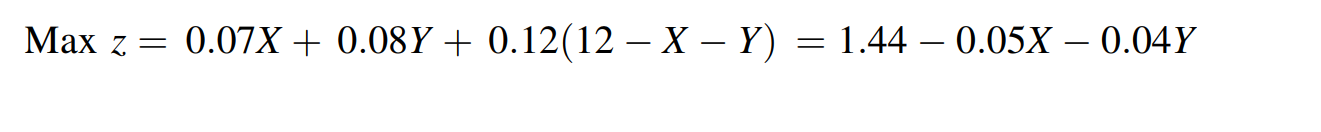

In [ ]:
model = pyo.ConcreteModel()

#sets

model.i = pyo.RangeSet(1,2)

# parameters  returns from the investment

model.r = pyo.Param(model.i, initialize = {1:-0.05, 2:-0.04})
r = model.r

model.p = pyo.Param(model.i,initialize =  {1:1,2:-3})
p = model.p

# Variables
model.x = pyo.Var(model.i, within=pyo.NonNegativeReals)
x = model.x

# objective function
def Objective_rule(model):

  return sum(r[i]*x[i] for i in model.i)+1440

model.Objf = pyo.Objective(rule=Objective_rule,sense=pyo.maximize)

#constraints
#x+y>=12000
def Constraint1(model,i):
  return sum(x[i] for i in model.i)>=12000

model.Const1 = pyo.Constraint(model.i,rule = Constraint1)

#x+y<=10000
def Constraint2(model,i):
  return sum(x[i] for i in model.i)<=10000

model.Const2 = pyo.Constraint(model.i,rule = Constraint2)

#x-3y>=0
def Constraint3(model,i):
  return sum(p[i]*x[i] for i in model.i)>=0

model.Const3 = pyo.Constraint(model.i,rule = Constraint3)

Solver = SolverFactory("glpk")
results = Solver.solve(model)

print(results)
print("obj func = ",model.Objf)

for i in model.i:
  print(" investment in ",i, "=",x[i]())




Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 3
  Number of nonzeros: 12
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0056629180908203125

obj func =  Objf
 investment in  1 = None
 investment in  2 = None
